# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

## Cargamos los datos de entrada del archivo csv

In [3]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [4]:
dataframe

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [5]:
dataframe.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

Al haber tantos datos de un SO (el 0) con respecto del resto, sería posible tener un conjunto de datos sesgado que incurriera en un modelo incorrecto. 


## Visualizamos los datos

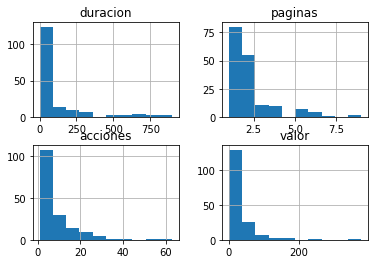

In [6]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

dataframe.drop(['clase'], 1).hist()
plt.show()

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


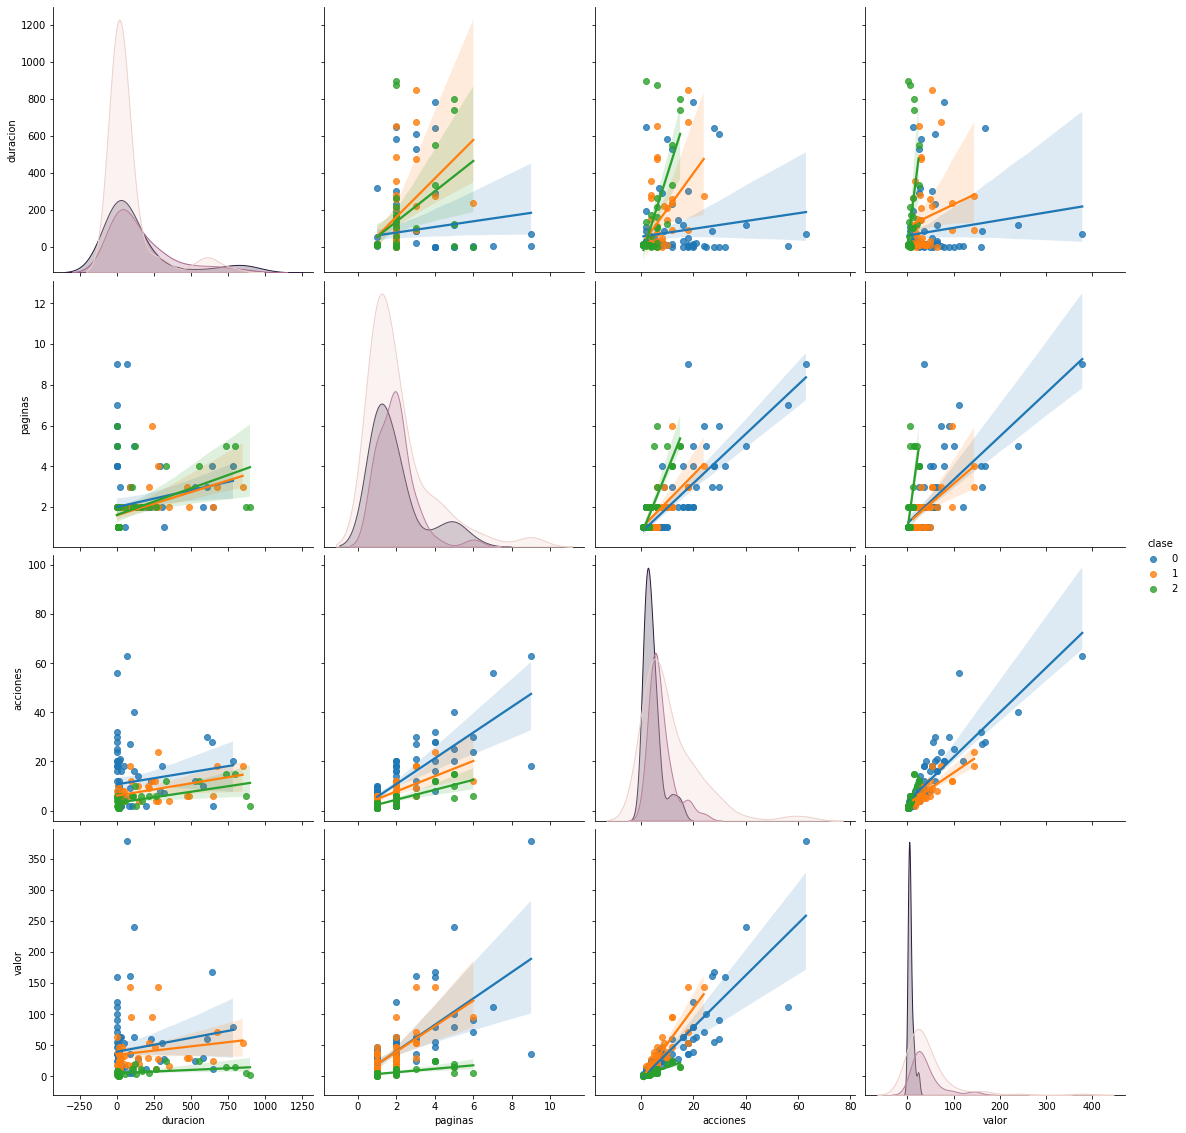

In [7]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

## Creamos el modelo

In [8]:
dataframe.drop(['clase'], 1)

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [9]:
X = np.array(dataframe.drop(['clase'], axis=1)) # se elimina la columna target y se asignan los datos a un array (objeto que se necesita para la regresión logística)
y = np.array(dataframe['clase']) # la columna target se transforma en array (ídem)
print(y.shape)
X.shape

(170,)


(170, 4)

In [10]:
#model = linear_model.LogisticRegression(tol=0.75, C=9)
model = linear_model.LogisticRegression(max_iter=100) # Máximo número de operaciones =100
model.fit(X,y)

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [11]:
#model = linear_model.LogisticRegression(tol=0.75, C=9)
model = linear_model.LogisticRegression(max_iter=500) # Máximo número de operaciones =500 -> comprobar el éxito de entrenamiento con score
model.fit(X,y)

LogisticRegression(max_iter=500)

In [12]:
model = linear_model.LogisticRegression(tol=0.75, C=9, max_iter=100, solver='lbfgs') # Además de liblinear, hay otros modelos de score
model.fit(X,y)
model.score(X,y)

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7764705882352941

In [13]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0
 0 1 1 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [14]:
model.score(X,y)

0.7764705882352941

In [15]:
X_new = pd.DataFrame({'duracion': [7.0], 'paginas': [2], 'acciones': [4], 'valor': [8]})
X_new

,duracion,paginas,acciones,valor
0,7.0,2,4,8


In [16]:
X_new.shape

(1, 4)

In [17]:
model.predict(X_new)

array([2], dtype=int64)

## Adicional: Validación del Modelo

In [18]:
# se genera el conjunto de datos a analizar/genera modelo 
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape)
X_test.shape

(136, 4)


(34, 4)

#### New update:

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

Convergence

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [19]:
# creación del objeto de análisis en Kfold
name='Logistic Regression'
model = linear_model.LogisticRegression(max_iter=100)
kfold = model_selection.KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation

# con esta línea de código se generan los resultados de las permutaciones del 'kfold' (en este caso 10), PERO NO SE GENERA EL MODELO
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std())
print(cv_results)
print("----------")
print(msg)
print("----------")
print("----------")

# dada la serie de porcentajes recibidos, sería interesante poder seleccionar cuales formarán parte del X_test y cuales del X_train
# por ejemplo, poder escoger los dos más bajos para formar el X_train (tienen peor porcentaje por lo tanto son más complicados de predecir -> verifican mejor el modelo)

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

In [20]:
# model_selection.cross_val_score NO GENERA MODELOS, HAY QUE GENERARLO 
model.fit(X_train,Y_train)

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
model.score(X_train, Y_train)

0.7647058823529411

In [22]:

model.score(X_test, Y_test)

0.8529411764705882

esta diferencia indica que el modelo no es generalista (el valor de porcentaje alto depende de los datos y no del modelo)

In [23]:
X_test[0]

array([12.,  1.,  6., 48.])

In [24]:
Y_test[0]

1

In [25]:
model.predict(X_test[0:1])[0]

1

In [26]:
model.predict_proba(X_test[0:1])[0]

array([4.93949636e-01, 5.06050364e-01, 1.36672413e-19])

In [27]:
max(model.predict_proba(X_test[0:1])[0])

0.5060503636609437

In [28]:
sum(model.predict_proba(X_test[0:1])[0])

1.0

In [29]:
predictions = model.predict(X_test)
print(model.score(X=X_test, y=Y_test))
print(accuracy_score(Y_test, predictions))

0.8529411764705882
0.8529411764705882


In [30]:
# Otra forma de calcular
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


## Reporte de Resultados

In [31]:
Y_test.shape

(34,)

Diagonal principal = True positive

![](Confusion_matrix_multilabel.png)

In [32]:
print(confusion_matrix(Y_test, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


# Clasificación de nuevos registros

In [35]:
X_new = pd.DataFrame({'duracion': [10, 4], 'paginas': [3,10], 'acciones': [5,1], 'valor': [9,987]})
X_new

,duracion,paginas,acciones,valor
0,10,3,5,9
1,4,10,1,987


In [58]:
X_new.shape

(2, 4)

In [59]:
model.predict(X_new)

array([2, 1], dtype=int64)

In [42]:
X_new2 = dataframe.head(100).drop(['clase'], axis=1)
y_new2 = dataframe.head(100).clase
pred2 = model.predict(X_new2)
print(confusion_matrix(y_new2, pred2))

[[35  7  4]
 [14 16  0]
 [ 0  0 24]]
